# Graph Theory

Graph theory helps in solving real-world problems efficiently, making it
essential in technology and science

Kabui, Charles  
2025-03-31

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/computational-techniques-in-data-science/graph-theory/index.html) -- [Download as Notebook](https://toknow.ai/posts/computational-techniques-in-data-science/graph-theory/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/computational-techniques-in-data-science/graph-theory/index.pdf)
 *** 

## Introduction

Graph theory is the study of networks of connected objects. A graph
consists of **nodes (vertices)** and **edges (connections)**. If edges
have a **direction**, it’s a **directed graph (digraph)**; otherwise,
it’s **undirected**.

Why is Graph Theory Important?

1.  **Navigation & Routing** - Used in GPS systems, internet routing,
    and traffic optimization.  
2.  **Social Networks** - Helps analyze connections and influence, like
    in Facebook or Twitter.  
3.  **Data Relationships** - Useful in databases, recommendation systems
    (Netflix, Amazon), and web linking (Google’s PageRank).  
4.  **Biology & Chemistry** - Helps model DNA structures, chemical
    compounds, and disease spread.  
5.  **Artificial Intelligence** - Used in neural networks, decision
    trees, and search algorithms.  
6.  **Project Management** - Critical path analysis in workflows and
    task dependencies.

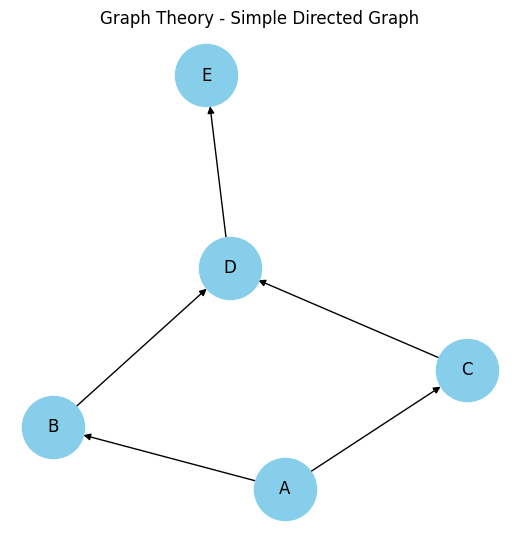

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges (connections)
edges = [
    ("A", "B"), 
    ("A", "C"), 
    ("B", "D"), 
    ("C", "D"), 
    ("D", "E")
]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(5, 5))
nx.draw(
    G, 
    with_labels=True, 
    node_color="skyblue", 
    edge_color="black", 
    arrows=True, 
    node_size=2000, 
    font_size=12)
plt.title("Graph Theory - Simple Directed Graph")
plt.show()

## Applications

### Question 1: Shortest Path in a Road Network (**Dijkstra’s Algorithm)**

A logistics company called Home Logistics wants to determine the most
efficient route between two cities in a given road network. The network
is represented as a graph where cities are nodes and roads are edges
with weights corresponding to the travel distance (in kilometers).

Given the following graph representation of a road network, write a
Python program using Dijkstra’s Algorithm to find the shortest path from
City A to City F.

Graph Data (as adjacency list):

``` python
roads = { 
    'A': {'B': 4, 'C': 2}, 
    'B': {'A': 4, 'C': 5, 'D': 10}, 
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8}, 
    'D': {'B': 10, 'C': 3, 'E': 6, 'F': 2}, 
    'E': {'C': 8, 'D': 6, 'F': 4}, 
    'F': {'D': 2, 'E': 4} 
}
```

#### Answer

In [17]:
# Create graph
G = nx.Graph()
edges = [
    ("A", "B", 4), 
    ("A", "C", 2), 
    ("B", "C", 5), 
    ("B", "D", 10),
    ("C", "D", 3), 
    ("C", "E", 8), 
    ("D", "E", 6), 
    ("D", "F", 2), 
    ("E", "F", 4)
]
G.add_weighted_edges_from(edges)

# Compute shortest path from A to F
path = nx.shortest_path(
    G, 
    source="A", 
    target="F", 
    weight="weight")
distance = nx.shortest_path_length(
    G, 
    source="A", 
    target="F", 
    weight="weight")

print("Shortest Path:", path)
print("Total Distance:", distance, "km")

Shortest Path: ['A', 'C', 'D', 'F']
Total Distance: 7 km

### Question 2: Influence Analysis in a Social Network (**PageRank Algorithm**)

A social media platform wants to identify the most influential users
based on follower relationships. The network is represented as a
directed graph, where each user is a node, and an edge from user A to
user B means that A follows B. Given the following directed graph of
follower relationships, implement a Python program using the PageRank
algorithm to rank users by influence.

Graph Representation:

``` python
followers = { 
    'Alice': ['Bob', 'Charlie'], 
    'Bob': ['Charlie', 'David'], 
    'Charlie': ['David'], 
    'David': ['Alice'], 
    'Eve': ['Alice', 'Charlie'] 
}
```

Compute the PageRank scores and determine the most influential user.

#### Answer

In [ ]:
# Create directed graph
G = nx.DiGraph()
# Graph representation
followers = {
    'Alice': ['Bob', 'Charlie'],
    'Bob': ['Charlie', 'David'],
    'Charlie': ['David'],
    'David': ['Alice'],
    'Eve': ['Alice', 'Charlie']
}
for user, following in followers.items():
    G.add_edges_from((user, f) for f in following)

# Compute PageRank
pagerank_scores = nx.pagerank(G)
print("User Rankings (Most Influential First):")
# sort by PageRank score
sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

User Rankings (Most Influential First):

[('David', 0.2926192854405204),
 ('Alice', 0.2914779704710639),
 ('Charlie', 0.23202522727386252),
 ('Bob', 0.15387751681455353),
 ('Eve', 0.030000000000000006)]

### Question 3: Maximum Flow in a Water Distribution System (**Ford-Fulkerson Algorithm**)

A city’s water supply system consists of reservoirs, pipelines, and
distribution points. The system is represented as a directed graph,
where nodes represent junctions (reservoirs or city areas) and edges
represent water pipelines with capacity limits. Given the following
network, where the source is S (reservoir) and the sink is T (city
distribution center), use the Ford-Fulkerson algorithm to determine the
maximum amount of water that can be transported to the city.

Graph Representation (with capacities):

``` python
water_network = { 
    'S': {'A': 16, 'B': 13}, 
    'A': {'B': 10, 'C': 12}, 
    'B': {'D': 14}, 
    'C': {'B': 9, 'T': 20}, 
    'D': {'C': 7, 'T': 4}, 
    'T': {} 
}
```

Write a Python program to compute the maximum flow from S to T.

#### Answer

In [30]:
# Create directed graph with capacities
G = nx.DiGraph()
edges = [
    ("S", "A", 16), 
    ("S", "B", 13), 
    ("A", "B", 10), 
    ("A", "C", 12),
    ("B", "D", 14), 
    ("C", "B", 9), 
    ("C", "T", 20), 
    ("D", "C", 7), 
    ("D", "T", 4)
]
G.add_weighted_edges_from(
    edges, 
    weight="capacity")

# Compute max flow from S to T
flow_value, flow_dict = nx.maximum_flow(G, "S", "T")
print("Maximum Flow:", flow_value, "units")

Maximum Flow: 23 units

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***